In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

sns.set_style("whitegrid")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [4]:
path = 'data/processed'
benchmarks_df = pd.read_csv(os.path.join(path, 'a_benchmarks_2024-09-11.csv'))
schools_df = pd.read_csv(os.path.join(path, 'a_schools_2024-08-29.csv'))
courseSections_df = pd.read_csv(os.path.join(path, 'a_courseSections_2024-08-29.csv'))
courseSectionRosters_df = pd.read_csv(os.path.join(path, 'a_courseSectionRosters_2024-08-29.csv'))
scores_df = pd.read_csv(os.path.join(path, 'a_scores_2024-09-11.csv'))
vendorUsage_df = pd.read_csv(os.path.join(path, 'a_vendorUsage_2024-09-11.csv'))

/var/folders/w3/z8qntdcx62v2qmj6z9fwfhrh0000gp/T/ipykernel_2346/4073666699.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  courseSectionRosters_df = pd.read_csv(os.path.join(path, 'a_courseSectionRosters_2024-08-29.csv'))


In [5]:
print("benchmarks_df columns:")
print(benchmarks_df.columns)
print("\nschools_df columns:")
print(schools_df.columns)
print("\ncourseSections_df columns:")
print(courseSections_df.columns)
print("\ncourseSectionRosters_df columns:")
print(courseSectionRosters_df.columns)
print("\nscores_df columns:")
print(scores_df.columns)
print("\nvendorUsage_df columns:")
print(vendorUsage_df.columns)

benchmarks_df columns:
Index(['districtId', 'year', 'level', 'dataSource', 'value'], dtype='object')

schools_df columns:
Index(['id', 'name', 'districtId', 'costCenter', 'abbreviation',
       'acqRequestSelectable', 'oneRoster_sourcedId', 'oneRoster_ticketId'],
      dtype='object')

courseSections_df columns:
Index(['id', 'vanityId', 'year', 'schoolId'], dtype='object')

courseSectionRosters_df columns:
Index(['id', 'courseSectionId', 'studentId', 'studentLevel', 'ticket'], dtype='object')

scores_df columns:
Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
       'value_iReadyReading', 'value_actMasteryComposi

In [6]:
benchmarks_df.rename(columns={'value':'threshold'}, inplace=True)

## Create boolean proficiency label by merging scores_df and benchmarks_df

In [7]:
# Step 1: Select only columns starting with 'value_' and keep 'studentId', 'studentLevel', 'year'
value_columns = [col for col in scores_df.columns if col.startswith('value_')]
selected_columns = ['studentId', 'studentLevel', 'year'] + value_columns
scores_subset = scores_df[selected_columns]
scores_subset.head()

,studentId,studentLevel,year,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_nweaMath,value_nweaReading,value_nweaEnglish,value_iReadyMath,value_iReadyReading,value_actMasteryComposite,value_actMasteryReading,value_actMasteryMath,value_actMasteryScience,value_actMasteryEnglish,value_nweaELA,value_scantronMath,value_scantronReading,value_mapMath,value_mapEnglish,value_mapReading,value_mapRLA,value_scantronScience,value_scantronLanguage,value_ReadingFoundations,value_scantronAlgebra,value_eocMath,value_actELAScore,value_mapScience,value_LeapELAScale,value_LeapMathScale,value_LeapALScale,value_LeapE2Scale,value_LeapGmScale,value_LeapBlScale,value_LeapE3Scale,value_LeapUsScale,value_E1Scale,value_UsEsScale,value_accessReadingScale,value_accessReadingProficiency,value_accessCompositeScale,value_accesscompositeProficiency,value_dibelsReading,value_mapHistory,value_LEAPSocSci,value_scantronGeometry,value_MathMilestones,value_ELAMilestones,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
0,44774,9,2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,44774,8,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2841.0,2950,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,44774,8,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2808.0,2936,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,44775,8,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2580.0,2660,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,44775,8,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2705.0,2670,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# Step 2: Melt the scores_subset to create a long format
scores_long = scores_subset.melt(
    id_vars=['studentId', 'studentLevel', 'year'], 
    var_name='dataSource', 
    value_name='score'
)

# Step 3: Rename 'studentLevel' to 'level' to match benchmarks_df
scores_long.rename(columns={'studentLevel': 'level'}, inplace=True)

# Step 4: Remove the 'value_' prefix from the dataSource column
# scores_long['dataSource'] = scores_long['dataSource'].str.replace('value_', '', regex=False)

# Step 5: Drop rows with NaN scores
scores_long.dropna(subset=['score'], inplace=True)

scores_long.head(20)

,studentId,level,year,dataSource,score
0,44774,9,2018,value_actMathScore,0.0
1,44774,8,2017,value_actMathScore,0.0
2,44774,8,2017,value_actMathScore,0.0
3,44775,8,2017,value_actMathScore,0.0
4,44775,8,2017,value_actMathScore,0.0
5,44775,9,2018,value_actMathScore,0.0
6,44776,9,2018,value_actMathScore,0.0
7,44776,8,2017,value_actMathScore,0.0
8,44776,8,2017,value_actMathScore,0.0
9,44777,6,2017,value_actMathScore,0.0


In [9]:
# Step 6: Merge the long-format scores with the benchmarks
proficiency_melted_df = pd.merge(
    scores_long, 
    benchmarks_df[['year', 'level', 'dataSource', 'threshold']], 
    on=['year', 'level', 'dataSource'], 
    how='left'
)

# Check for any missing values after the merge
missing_benchmarks = proficiency_melted_df['threshold'].isna().sum()
print(f"Number of scores without corresponding benchmark: {missing_benchmarks}")

proficiency_melted_df.dropna(subset=['threshold'], inplace=True)
proficiency_melted_df.head(10)

Number of scores without corresponding benchmark: 17394463


,studentId,level,year,dataSource,score,threshold
1440,45054,11,2018,value_actMathScore,9.0,17.0
1441,45054,11,2018,value_actMathScore,0.0,17.0
2968,45440,11,2018,value_actMathScore,16.0,17.0
4848,45953,11,2018,value_actMathScore,17.0,17.0
5018,46042,11,2018,value_actMathScore,17.0,17.0
5019,46042,11,2018,value_actMathScore,18.0,17.0
5028,46066,11,2018,value_actMathScore,0.0,17.0
5033,46082,11,2018,value_actMathScore,0.0,17.0
5034,46082,11,2018,value_actMathScore,14.0,17.0
5063,46158,11,2018,value_actMathScore,0.0,17.0


In [10]:
# Step 7: Create the proficiency label
proficiency_melted_df['is_proficient'] = proficiency_melted_df['score'] >= proficiency_melted_df['threshold']
print(proficiency_melted_df.shape)
proficiency_melted_df.head(10)

(476297, 7)


,studentId,level,year,dataSource,score,threshold,is_proficient
1440,45054,11,2018,value_actMathScore,9.0,17.0,False
1441,45054,11,2018,value_actMathScore,0.0,17.0,False
2968,45440,11,2018,value_actMathScore,16.0,17.0,False
4848,45953,11,2018,value_actMathScore,17.0,17.0,True
5018,46042,11,2018,value_actMathScore,17.0,17.0,True
5019,46042,11,2018,value_actMathScore,18.0,17.0,True
5028,46066,11,2018,value_actMathScore,0.0,17.0,False
5033,46082,11,2018,value_actMathScore,0.0,17.0,False
5034,46082,11,2018,value_actMathScore,14.0,17.0,False
5063,46158,11,2018,value_actMathScore,0.0,17.0,False


In [11]:
# Step 8: Pivot the result back to wide format
proficiency_df = proficiency_melted_df.pivot_table(
    index=['studentId', 'level', 'year'],
    columns='dataSource',
    values='is_proficient'
)

# Reset the index to make 'studentId', 'level', and 'year' regular columns
proficiency_df.reset_index(inplace=True)

# Rename columns to indicate they are proficiency indicators
proficiency_df.rename(
    columns=lambda x: f'proficient_{x}' if x not in ['studentId', 'level', 'year'] else x,
    inplace=True
)

# Merge the proficiency indicators back with the original scores_df
proficiency_df = pd.merge(scores_df, proficiency_df, 
                    left_on=['studentId', 'studentLevel', 'year'],
                    right_on=['studentId', 'level', 'year'],
                    how='left')

# Remove the redundant 'level' column from the merge
proficiency_df.drop('level', axis=1, inplace=True)

# Display the first few rows of the resulting DataFrame
proficiency_df.head()

,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,value_actMathScore,value_actEnglishScore,value_actReadingScore,value_actScienceScore,value_actCompositeScore,value_nweaMath,value_nweaReading,value_nweaEnglish,value_iReadyMath,value_iReadyReading,value_actMasteryComposite,value_actMasteryReading,value_actMasteryMath,value_actMasteryScience,value_actMasteryEnglish,value_nweaELA,value_scantronMath,value_scantronReading,value_mapMath,value_mapEnglish,value_mapReading,value_mapRLA,value_scantronScience,value_scantronLanguage,value_ReadingFoundations,value_scantronAlgebra,value_eocMath,value_actELAScore,value_mapScience,value_LeapELAScale,value_LeapMathScale,value_LeapALScale,value_LeapE2Scale,value_LeapGmScale,value_LeapBlScale,value_LeapE3Scale,value_LeapUsScale,value_E1Scale,value_UsEsScale,value_accessReadingScale,value_accessReadingProficiency,value_accessCompositeScale,value_accesscompositeProficiency,value_dibelsReading,value_mapHistory,value_LEAPSocSci,value_scantronGeometry,value_MathMilestones,value_ELAMilestones,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading,proficient_value_actCompositeScore,proficient_value_actEnglishScore,proficient_value_actMathScore,proficient_value_actReadingScore,proficient_value_actScienceScore,proficient_value_scantronMath,proficient_value_scantronReading,proficient_value_starMath
0,44774,9,2018,6,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44774,8,2017,6,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2841.0,2950,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.5,0.0,NaN
2,44774,8,2017,4,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2808.0,2936,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.5,0.0,NaN
3,44775,8,2017,4,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2580.0,2660,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,44775,8,2017,6,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2705.0,2670,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [109]:
print(proficiency_melted_df['level'].value_counts())
print()
print(proficiency_melted_df['year'].value_counts())

level
4     77920
5     77535
3     76372
6     75948
7     74355
8     72759
11    21408
Name: count, dtype: int64

year
2018    263870
2017    212427
Name: count, dtype: int64


In [110]:
level_year_counts = proficiency_melted_df.groupby(['level', 'year']).size().unstack(fill_value=0)
print(level_year_counts)

year    2017   2018
level              
3      35786  40586
4      35191  42729
5      34887  42648
6      34128  41820
7      33131  41224
8      32706  40053
11      6598  14810


In [12]:
level_dataSource_counts = proficiency_melted_df.groupby(['level', 'dataSource']).size().unstack(fill_value=0)
level_dataSource_counts

dataSource,value_actCompositeScore,value_actEnglishScore,value_actMathScore,value_actReadingScore,value_actScienceScore,value_scantronMath,value_scantronReading,value_starMath
level,,,,,,,,
3,0,0,0,0,0,27810,34331,14231
4,0,0,0,0,0,28127,34799,14994
5,0,0,0,0,0,27867,34688,14980
6,0,0,0,0,0,27198,34033,14717
7,0,0,0,0,0,26622,33225,14508
8,0,0,0,0,0,26161,32517,14081
11,9560,2962,2962,2962,2962,0,0,0


# Predicting (composite) ACT scores for level 11

## Create DataFrame

In [55]:
act_11_df = proficiency_melted_df[proficiency_melted_df['level'] == 11]

# Merge subgroup columns from scores_df into act_11_df
subgroup_columns = ['subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25']
act_11_df = act_11_df.merge(scores_df[['studentId'] + subgroup_columns], on='studentId', how='left')

act_11_df.head()

,studentId,level,year,dataSource,score,threshold,is_proficient,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25
0,45054,11,2018,value_actMathScore,9.0,17.0,False,0,0,0,0,0,0
1,45054,11,2018,value_actMathScore,9.0,17.0,False,0,0,0,0,0,0
2,45054,11,2018,value_actMathScore,0.0,17.0,False,0,0,0,0,0,0
3,45054,11,2018,value_actMathScore,0.0,17.0,False,0,0,0,0,0,0
4,45440,11,2018,value_actMathScore,16.0,17.0,False,0,0,0,0,0,0


In [57]:
# Merge act_11_df with courseSectionRosters_df to get course_ids for each student
act_11_courses = act_11_df.merge(courseSectionRosters_df[['studentId', 'courseSectionId']], 
                                 on='studentId', how='left')

# Merge with courseSections to get vanityId and schoolId
act_11_courses = act_11_courses.merge(courseSections_df[['id', 'vanityId', 'schoolId']], 
                                      left_on='courseSectionId', right_on='id', how='left')

# Create binary features for each unique course vanityId
course_dummies = pd.get_dummies(act_11_courses['vanityId'], prefix='course')

# Aggregate the binary features and schoolId by studentId
act_11_courses_grouped = pd.concat([course_dummies, act_11_courses[['studentId', 'schoolId']]], axis=1)
act_11_courses_grouped = act_11_courses_grouped.groupby('studentId').agg({
    **{col: 'max' for col in course_dummies.columns},
    'schoolId': 'first'  # Take the first non-null schoolId for each student
})

# Merge the binary course features and schoolId back to act_11_df
act_11_df = act_11_df.merge(act_11_courses_grouped, on='studentId', how='left')

# Fill NaN values with 0 for course features (students not enrolled in a course)
course_columns = [col for col in act_11_df.columns if col.startswith('course_')]
act_11_df[course_columns] = act_11_df[course_columns].fillna(0)

# Merge act_11_df with schools_df to get school names
act_11_df = act_11_df.merge(schools_df[['id', 'name']], left_on='schoolId', right_on='id', how='left')

# Rename the 'name' column to 'school'
act_11_df = act_11_df.rename(columns={'name': 'school'})

# Drop the 'id' and 'schoolId' columns
act_11_df = act_11_df.drop(['id', 'schoolId'], axis=1)

In [58]:
# Display the first few rows to verify the result
act_11_df.head()

,studentId,level,year,dataSource,score,threshold,is_proficient,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,course_3-D Solid I,course_AAS:CBI,course_AAS:EngLA-10,course_AAS:EngLA-11,course_AAS:EngLA-8,course_AAS:EngLA-9,course_AAS:Life-10,course_AAS:Life-11,course_AAS:Life-8,course_AAS:Life-9,course_AAS:Math-10,course_AAS:Math-11,course_AAS:Math-8,course_AAS:Math-9,course_AAS:Sci-10,course_AAS:Sci-11,course_AAS:Sci-8,course_AAS:Sci-9,course_AAS:SoSt-10,course_AAS:SoSt-11,course_AAS:SoSt-8,course_AAS:SoSt-9,course_AAS:Vocat-1,course_AAS:Vocat-10,course_ACT REVIEW,course_ACT ROI,course_ACT Review,course_ACT/WK Rev.,course_ACTReview 1C,course_ACTReview.5C,course_AG Communica,course_AIDE-ELEM,course_AIDE-LIB,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ALG I B ACCE,course_ALG I PREAP,course_ALGIA ACCESS,course_ALIITRIGH/A,course_ALIITRIGPRE,course_AP Biology,course_AP Chemistry,course_APCompSciPr,course_APPhysicsI,course_ARMY LET I,course_ARMY LET II,course_ARMY LET III,course_ARMY LET IV,course_ARMYLETIVACT,course_ART VIS II,course_ART VIS I,course_ATH I V GIRL,course_ATHL CHEER V,course_ATHLE BOYS,course_ATHLE GIRLS,course_ATHLETICS JV,course_AUT 114,course_AUT 116,course_AcAdv.Baseba,course_AcAdv.Basket,course_AcAdv.Cheer,course_AcAdv.CrossC,course_AcAdv.Footb,course_AcAdv.Soccer,course_AcAdv.Softba,course_AcAdv.Track,course_AcAdv.Volley,course_AcAdvSoccerL,course_Accounting,course_AdapPE9-12,course_Adv Arch Des,course_Adv BTA,course_Advanced Agr,course_Advisory 8,course_Agriscience,course_Aide Off 7-8,course_Airframe Sys,course_Alg Esntls A,course_Alg Esntls B,course_Alg Ess,course_Alg I Adv,"course_Alg I, Adv",course_Alg II/Trig,course_AlgConACC,course_AlgEnrichmet,course_AlgEsswFin,course_AlgFinAccess,course_AlgII/TrigAC,course_Algebra I,course_Algebra I A,course_Algebra I B,course_Algebra I*,course_Algebra IH,course_Algebra II,course_AlgebraicCon,course_AlgwithFinan,course_Alt Current,course_AnaPhysAdACC,course_Anat/PhysAdv,course_Anat/Physio,course_Anthropology,course_Appl Ag Mech,course_Arc/Con/Mfg,course_ArmyJROTC-D1,course_ArmyJROTC-D3,course_ArmyJROTC-D4,course_Art App,course_ArtEnrich7-8,course_ArtSurACCE.5,course_Arts Survey,course_AthCheerJV,course_AthlBaseball,course_AthlBaskball,course_AthlCheerV,course_AthlConditio,course_AthlFBV,course_AthlJV,course_AthlSoccer,course_AthlSoftball,course_AthlVGirlsI,course_AthlVolleyb,course_AthlWrestl,course_Athletics-JV,course_AttenAide,course_Auto Tech A,course_Auto Tech B,course_BAND 8 Adv.,course_BAND 8 Brass,course_BAND 8 Wood,course_BAND BEGIN,course_BAND JAZZ,course_BAND MARCH,course_BANDCONCERT,course_BANDMARCHAUX,course_BANDPERCUS,course_BASEBALL,course_BIOLOGY ADV,course_BIOLOGYPREAP,course_BROADCAS 7-8,course_Bak & Pstr A,course_Band8,course_BandConcer.5,course_BandConcer1C,course_BandGuitar78,course_BandMarch.5C,course_BandSymph 1C,course_BdogAmbasdor,course_Biology,course_Biology Adv,course_BiologyACCES,course_Bnkg Fin Ser,course_Broadcast7-8,course_BullBogAdv,course_BulldogAdvi,course_Bus Finance,course_Bus Tech App,course_CABINETMAK I,course_CABINETMAKII,course_CHEMISTRYAP,course_COMP MS,course_CONST FISYS,course_CONST FRAME,course_CONTISS 7-8,course_CONTISSU 7-8,course_CONTISSUES,course_CREAWRT 7-8,course_CREDIT RECOV,course_CSElec Gr7-8,course_Cabntmkng I,course_Cabntmkng II,course_CabntmkngIII,course_Calc AB AP,"course_Calc AB, AP",course_Career Prep,course_CareerPrep-A,course_CareerPrep-B,course_Carpentry I,course_ChambChorII,course_ChambChorIII,course_ChambChorIV,course_Chemistry,course_ChemistryAdv,course_Chemsty Food,course_Child Serv I,course_CivicsGr 7,course_CollCarExp,course_ComPrgBasicI,course_Comp Mgt Sup,course_CompSciA AP,course_ConcBand III,course_ConcBand IV,course_Concert B I,course_Const Fin In,course_Const Frmng,course_ContIssu 7-8,course_Contemp Iss,course_ContempIss1C,course_Coop/WBE1,course_CoopSem/WBE1,course_Crea Writing,course_CreatWrt.5C,course_CreatWrtACCE,course_Credit Adva

In [60]:
# One-hot encode the 'school' column
school_dummies = pd.get_dummies(act_11_df['school'], prefix='school')

# Concatenate the one-hot encoded columns with the original dataframe
act_11_df = pd.concat([act_11_df, school_dummies], axis=1)

# Drop the original 'school' column
act_11_df = act_11_df.drop('school', axis=1)

# Display the first few rows to verify the result
act_11_df.head()

KeyError: 'school'

In [61]:
actCompositeScore_11_df = act_11_df[act_11_df['dataSource'] == 'value_actCompositeScore']

## Train models

In [116]:
# Check for class imbalance
actCompositeScore_11_df['is_proficient'].value_counts()

is_proficient
False    16342
True      2275
Name: count, dtype: int64

Top 10 features correlated with is_proficient:
course_ChemistryAdv    0.520100
course_Eng Gr10 Adv    0.504193
course_Precalculus     0.487155
course_Eng Lang AP     0.453487
course_USHis I Adv     0.420162
course_Algebra IH      0.420020
course_Alg II/Trig     0.403129
course_Geometry Adv    0.385727
course_WH1500-P Adv    0.385212
course_US HistoryAP    0.384212
Name: is_proficient, dtype: float64


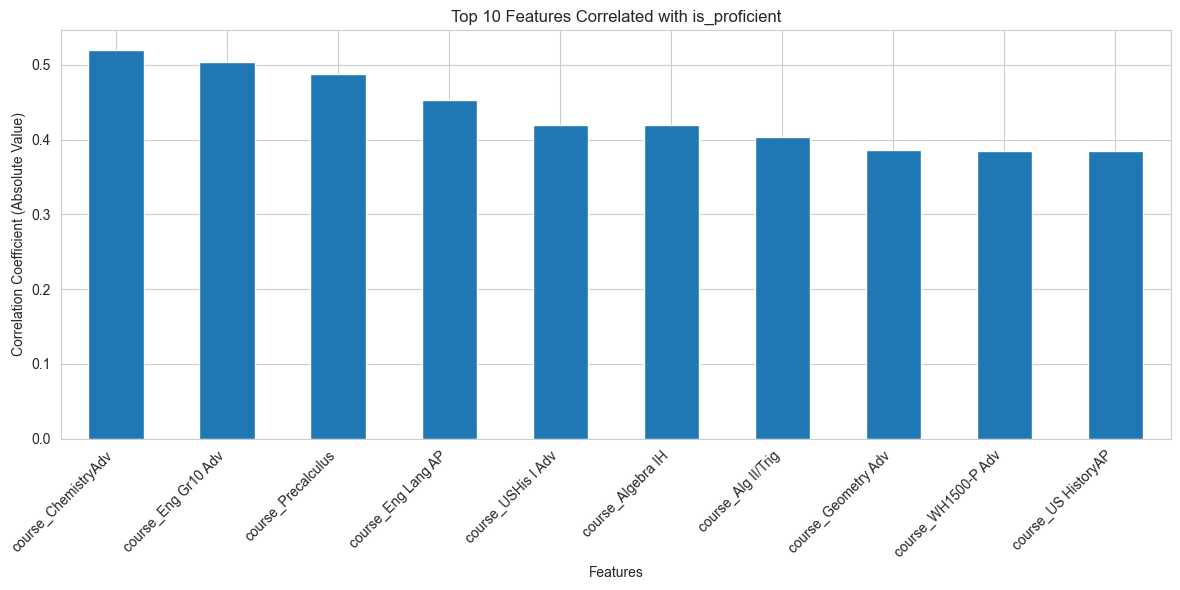

In [122]:
# Calculate correlation between features and is_proficient
correlation_series = actCompositeScore_11_df.drop(['studentId', 'level', 'year', 'dataSource', 'score', 'threshold'], axis=1).corr()['is_proficient']

# Sort correlations by absolute value in descending order and select top 10
top_10_correlations = correlation_series.abs().sort_values(ascending=False)[1:11]

print("Top 10 features correlated with is_proficient:")
print(top_10_correlations)

# Visualize the top 10 correlations
plt.figure(figsize=(12, 6))
top_10_correlations.plot(kind='bar')
plt.title('Top 10 Features Correlated with is_proficient')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient (Absolute Value)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [18]:
# TODO: try adding school, only using top x features, add vendorUsage data

### Principal component analysis

Number of components explaining 95% of variance: 358


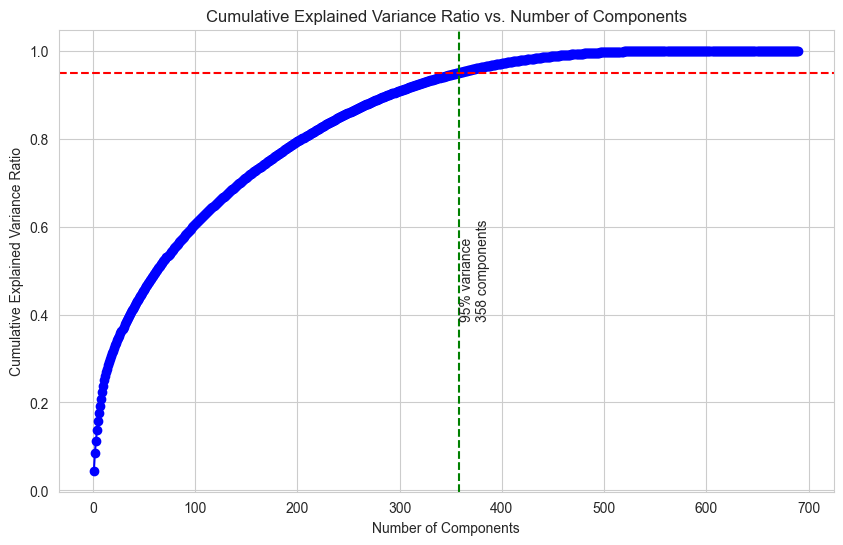

Shape of data after PCA: (18617, 358)


In [66]:
from sklearn.preprocessing import StandardScaler

# Prepare the features for PCA
X_pca = actCompositeScore_11_df.drop(['studentId', 'level', 'year', 'dataSource', 'score', 'threshold', 'is_proficient'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain 95% of the variance
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"Number of components explaining 95% of variance: {n_components_95}")

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.axvline(x=n_components_95, color='g', linestyle='--')
plt.text(n_components_95 + 1, 0.5, f'95% variance\n{n_components_95} components', rotation=90, verticalalignment='center')
plt.grid(True)
plt.show()

# Apply PCA with the number of components that explain 95% of the variance
pca_95 = PCA(n_components=n_components_95)
X_pca_95 = pca_95.fit_transform(X_scaled)

print(f"Shape of data after PCA: {X_pca_95.shape}")


In [69]:
X_pca_95.dtype

dtype('float64')

### Logistic regression

In [20]:
actCompositeScore_11_df.head()

,studentId,level,year,dataSource,score,threshold,is_proficient,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,subgroup_ell,subgroup_bottom25,course_3-D Solid I,course_AAS:CBI,course_AAS:EngLA-10,course_AAS:EngLA-11,course_AAS:EngLA-8,course_AAS:EngLA-9,course_AAS:Life-10,course_AAS:Life-11,course_AAS:Life-8,course_AAS:Life-9,course_AAS:Math-10,course_AAS:Math-11,course_AAS:Math-8,course_AAS:Math-9,course_AAS:Sci-10,course_AAS:Sci-11,course_AAS:Sci-8,course_AAS:Sci-9,course_AAS:SoSt-10,course_AAS:SoSt-11,course_AAS:SoSt-8,course_AAS:SoSt-9,course_AAS:Vocat-1,course_AAS:Vocat-10,course_ACT REVIEW,course_ACT ROI,course_ACT Review,course_ACT/WK Rev.,course_ACTReview 1C,course_ACTReview.5C,course_AG Communica,course_AIDE-ELEM,course_AIDE-LIB,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ALG I B ACCE,course_ALG I PREAP,course_ALGIA ACCESS,course_ALIITRIGH/A,course_ALIITRIGPRE,course_AP Biology,course_AP Chemistry,course_APCompSciPr,course_APPhysicsI,course_ARMY LET I,course_ARMY LET II,course_ARMY LET III,course_ARMY LET IV,course_ARMYLETIVACT,course_ART VIS II,course_ART VIS I,course_ATH I V GIRL,course_ATHL CHEER V,course_ATHLE BOYS,course_ATHLE GIRLS,course_ATHLETICS JV,course_AUT 114,course_AUT 116,course_AcAdv.Baseba,course_AcAdv.Basket,course_AcAdv.Cheer,course_AcAdv.CrossC,course_AcAdv.Footb,course_AcAdv.Soccer,course_AcAdv.Softba,course_AcAdv.Track,course_AcAdv.Volley,course_AcAdvSoccerL,course_Accounting,course_AdapPE9-12,course_Adv Arch Des,course_Adv BTA,course_Advanced Agr,course_Advisory 8,course_Agriscience,course_Aide Off 7-8,course_Airframe Sys,course_Alg Esntls A,course_Alg Esntls B,course_Alg Ess,course_Alg I Adv,"course_Alg I, Adv",course_Alg II/Trig,course_AlgConACC,course_AlgEnrichmet,course_AlgEsswFin,course_AlgFinAccess,course_AlgII/TrigAC,course_Algebra I,course_Algebra I A,course_Algebra I B,course_Algebra I*,course_Algebra IH,course_Algebra II,course_AlgebraicCon,course_AlgwithFinan,course_Alt Current,course_AnaPhysAdACC,course_Anat/PhysAdv,course_Anat/Physio,course_Anthropology,course_Appl Ag Mech,course_Arc/Con/Mfg,course_ArmyJROTC-D1,course_ArmyJROTC-D3,course_ArmyJROTC-D4,course_Art App,course_ArtEnrich7-8,course_ArtSurACCE.5,course_Arts Survey,course_AthCheerJV,course_AthlBaseball,course_AthlBaskball,course_AthlCheerV,course_AthlConditio,course_AthlFBV,course_AthlJV,course_AthlSoccer,course_AthlSoftball,course_AthlVGirlsI,course_AthlVolleyb,course_AthlWrestl,course_Athletics-JV,course_AttenAide,course_Auto Tech A,course_Auto Tech B,course_BAND 8 Adv.,course_BAND 8 Brass,course_BAND 8 Wood,course_BAND BEGIN,course_BAND JAZZ,course_BAND MARCH,course_BANDCONCERT,course_BANDMARCHAUX,course_BANDPERCUS,course_BASEBALL,course_BIOLOGY ADV,course_BIOLOGYPREAP,course_BROADCAS 7-8,course_Bak & Pstr A,course_Band8,course_BandConcer.5,course_BandConcer1C,course_BandGuitar78,course_BandMarch.5C,course_BandSymph 1C,course_BdogAmbasdor,course_Biology,course_Biology Adv,course_BiologyACCES,course_Bnkg Fin Ser,course_Broadcast7-8,course_BullBogAdv,course_BulldogAdvi,course_Bus Finance,course_Bus Tech App,course_CABINETMAK I,course_CABINETMAKII,course_CHEMISTRYAP,course_COMP MS,course_CONST FISYS,course_CONST FRAME,course_CONTISS 7-8,course_CONTISSU 7-8,course_CONTISSUES,course_CREAWRT 7-8,course_CREDIT RECOV,course_CSElec Gr7-8,course_Cabntmkng I,course_Cabntmkng II,course_CabntmkngIII,course_Calc AB AP,"course_Calc AB, AP",course_Career Prep,course_CareerPrep-A,course_CareerPrep-B,course_Carpentry I,course_ChambChorII,course_ChambChorIII,course_ChambChorIV,course_Chemistry,course_ChemistryAdv,course_Chemsty Food,course_Child Serv I,course_CivicsGr 7,course_CollCarExp,course_ComPrgBasicI,course_Comp Mgt Sup,course_CompSciA AP,course_ConcBand III,course_ConcBand IV,course_Concert B I,course_Const Fin In,course_Const Frmng,course_ContIssu 7-8,course_Contemp Iss,course_ContempIss1C,course_Coop/WBE1,course_CoopSem/WBE1,course_Crea Writing,course_CreatWrt.5C,course_CreatWrtACCE,course_Credit Adva

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Prepare the features and target
X = actCompositeScore_11_df.drop(['studentId', 'level', 'year', 'dataSource', 'score', 'threshold', 'is_proficient'], axis=1)
y = actCompositeScore_11_df['is_proficient']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_samples = min(sum(y_train == 0), sum(y_train == 1))
n_samples = max(n_samples, 2000)  # Cap at 5000 samples per class

# Define the resampling strategies
over = SMOTE(sampling_strategy={True: n_samples})
under = RandomUnderSampler(sampling_strategy={False: n_samples, True: n_samples})

# Create a pipeline with SMOTE oversampling and Random Undersampling
pipeline = Pipeline([('over', over), ('under', under)])


In [34]:
# Fit and transform the training data
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)
y_resampled.value_counts()

is_proficient
False    2000
True     2000
Name: count, dtype: int64

              precision    recall  f1-score   support

       False       0.94      0.93      0.94      3288
        True       0.51      0.57      0.54       436

    accuracy                           0.89      3724
   macro avg       0.73      0.75      0.74      3724
weighted avg       0.89      0.89      0.89      3724



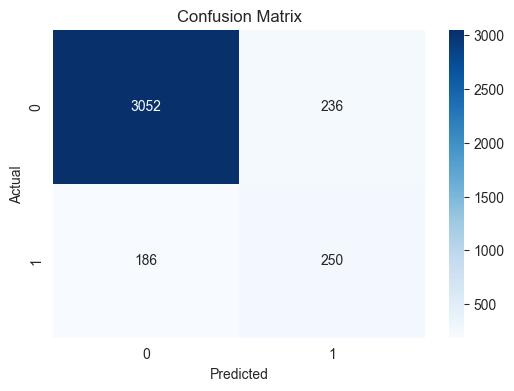

In [40]:
# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
# Ensure required libraries are imported
import matplotlib.pyplot as plt
import seaborn as sns

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Using class weights in the logistic regression model.

weighted_model = LogisticRegression(random_state=42, class_weight='balanced')
weighted_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_weighted = weighted_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_weighted))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred_weighted))

In [ ]:
# Adjusting the classification threshold.

y_pred_proba = model.predict_proba(X_test)[:, 1]
custom_threshold = 0.3  # You can adjust this value

y_pred_custom = (y_pred_proba >= custom_threshold).astype(int)

# Print the classification report
print(classification_report(y_test, y_pred_custom))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred_custom))


### Random forest